## üìö Table of Contents

### üß© [1. Building Blocks of Linear Regression](#building-blocks)
- [Hypothesis Function](#hypothesis-function)
- [Line Fitting (Geometric intuition)](#line-fitting)
- [Assumptions of Linear Models](#assumptions)

### üß© [2. Cost Function & Optimization](#cost-function)
- [Squared Error / MSE](#squared-error)
- [Gradient Descent (Single variable)](#gd-single)
- [Gradient Descent (Multivariable)](#gd-multi)
- [Vectorization for Speedup](#vectorization)

### üß© [3. Evaluation & Interpretation](#evaluation)
- [R¬≤ Score](#r2-score)
- [Underfitting & Model Diagnostics](#underfitting)
- [Visualizing Cost Surface](#cost-surface)


### <a id="building-blocks"></a>üß© **1. Building Blocks of Linear Regression**

#### <a id="hypothesis-function"></a>Hypothesis Function  
#### <a id="line-fitting"></a>Line Fitting (Geometric intuition)  
#### <a id="assumptions"></a>Assumptions of Linear Models  


### <a id="cost-function"></a>üß© **2. Cost Function & Optimization**

#### <a id="squared-error"></a>Squared Error / MSE  
#### <a id="gd-single"></a>Gradient Descent (Single variable)  
#### <a id="gd-multi"></a>Gradient Descent (Multivariable)  
#### <a id="vectorization"></a>Vectorization for Speedup  


### <a id="evaluation"></a>üß© **3. Evaluation & Interpretation**

#### <a id="r2-score"></a>R¬≤ Score  
#### <a id="underfitting"></a>Underfitting & Model Diagnostics  
#### <a id="cost-surface"></a>Visualizing Cost Surface


## üìê **Hypothesis Function**  

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

In linear regression, the **hypothesis function** is your model‚Äôs **best guess** for the relationship between inputs and outputs.

> **Analogy**: Think of it as a **crystal ball** that takes your input \( x \), does some math magic, and gives a predicted value \( \hat{y} \).

Linear regression tries to **learn the best straight-line formula** that connects your input features to the output. That formula? It‚Äôs the hypothesis.

---

### üîë **Key Terminology**

| Term               | Analogy or Meaning |
|--------------------|--------------------|
| **Hypothesis \( h_\theta(x) \)** | The model's predicted output |
| **Parameters \( \theta_0, \theta_1 \)** | Dial knobs to adjust the line |
| **Independent Variable (x)** | The input, e.g., hours studied |
| **Dependent Variable (y)** | The output, e.g., test score |
| **Prediction \( \hat{y} \)** | The model's guess for y |

---

## **2. Mathematical Deep Dive** üßÆ

### üìè **Core Equation (Univariate)**

For one feature:

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

- \( \theta_0 \): y-intercept  
- \( \theta_1 \): slope of the line

---

### üìê **Geometric Intuition**

- \( \theta_0 \): Where the line hits the y-axis (even when x = 0)  
- \( \theta_1 \): How much y changes when x increases ‚Äî **rise over run**

> The hypothesis is literally the equation of a line. We‚Äôre just trying to find the **best-fitting line** to the data points.

---

### ‚ö†Ô∏è **Pitfalls & Constraints**

| Mistake                        | Consequence                  |
|-------------------------------|------------------------------|
| Forgetting the intercept term | Line always passes through origin |
| Using non-linear data         | Hypothesis won't fit well    |
| Wrong data types for x/y      | Model can't compute anything |

---

## **3. Critical Analysis** üîç

| Strengths                  | Weaknesses                |
|----------------------------|---------------------------|
| Easy to interpret          | Can't model curves        |
| Good for trend estimation  | Fails on non-linear data  |
| Fast to compute            | Sensitive to outliers     |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** What does \( \theta_1 \) represent in the hypothesis function?

- A) The output variable  
- B) The model‚Äôs prediction  
- C) The slope of the line  
- D) The y-intercept

**Answer**: **C**

> \( \theta_1 \) shows how much y increases for every unit increase in x ‚Äî it's the slope.

---

### üß© **Code Debug Task**

```python
def predict(x, t0, t1):
    return t0 * t1 + x  # Bug: formula is wrong

# Fix:
def predict(x, t0, t1):
    return t0 + t1 * x
```

---

## **5. üìö Glossary**

| Term           | Meaning |
|----------------|--------|
| **Hypothesis**  | The function used to predict values |
| **Slope**       | Rate of change of output with respect to input |
| **Intercept**   | Predicted output when input = 0 |
| **Univariate**  | One feature/input variable |
| **Prediction**  | Output from the hypothesis function |

---


In [1]:

## **6. Practical Considerations** ‚öôÔ∏è

### üß™ **Python Implementation**

import numpy as np

def hypothesis(x: float, theta_0: float, theta_1: float) -> float:
    """
    Simple hypothesis function for univariate linear regression.
    Returns predicted y for given x.
    """
    return theta_0 + theta_1 * x

# Example: Predict score if someone studied for 5 hours
theta_0 = 50  # baseline score
theta_1 = 10  # points per hour
x = 5
y_pred = hypothesis(x, theta_0, theta_1)
print(f"Predicted score: {y_pred}")



Predicted score: 100


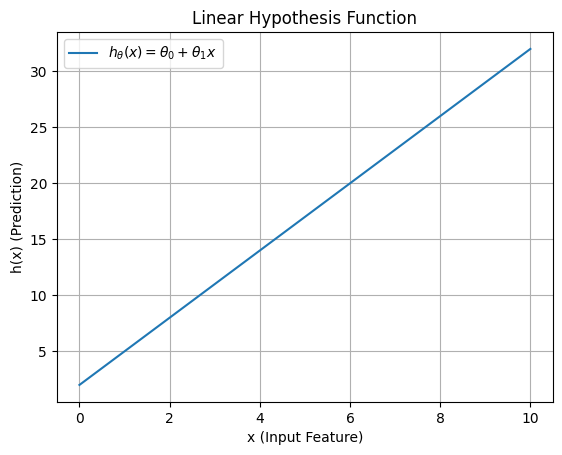

In [2]:

## **7. üêç Visualization: The Hypothesis Function as a Line**

import matplotlib.pyplot as plt

# Line params
theta_0 = 2
theta_1 = 3

# Input range
x_vals = np.linspace(0, 10, 100)
y_vals = hypothesis(x_vals, theta_0, theta_1)

plt.plot(x_vals, y_vals, label=r"$h_\theta(x) = \theta_0 + \theta_1 x$")
plt.xlabel("x (Input Feature)")
plt.ylabel("h(x) (Prediction)")
plt.title("Linear Hypothesis Function")
plt.grid(True)
plt.legend()
plt.show()


# üìè **Line Fitting (Geometric Intuition)**  

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

You‚Äôve got a cloud of data points (like hours studied vs. exam score), and your goal is to **fit a line** that represents their relationship.

That‚Äôs **line fitting** ‚Äî central to linear regression.

> **Analogy**: Imagine placing a tight elastic band through a scatter of nails hammered into a wall. The band should **hug the trend**, not zigzag through every point.

---

### üîë **Key Terminology**

| Term             | Analogy or Meaning |
|------------------|--------------------|
| **Line Fit**      | Best straight path through your data cloud |
| **Residual**      | How far a point is from the line (vertical error) |
| **Best Fit**      | The line with smallest total squared error |
| **Slope**         | How steep the line is |
| **Intercept**     | Where the line hits the y-axis (when \(x=0\)) |

---

## **2. Mathematical Deep Dive** üßÆ

### üìè **Equation of the Fitted Line**

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

- \( \theta_0 \): Intercept ‚Äî the starting point of the line  
- \( \theta_1 \): Slope ‚Äî how much \( y \) increases per unit of \( x \)

---

### üéØ **Objective of Line Fitting**

Find the line that **minimizes the sum of squared residuals**:

$$
\min_{\theta_0, \theta_1} \sum_{i=1}^{m} (y^{(i)} - h_\theta(x^{(i)}))^2
$$

> This ensures the line is as close as possible to all the data points **on average**.

---

### ‚ö†Ô∏è **Pitfalls & Visual Warnings**

| Problem | What Happens |
|---------|--------------|
| **Outliers** | Pull the line away from the core trend |
| **Non-linear trend** | Line can‚Äôt follow curves or cycles |
| **Assuming perfect fit** | Even good lines have some error (residuals) |

---

## **3. Critical Analysis** üîç

| Strength                        | Limitation                        |
|--------------------------------|-----------------------------------|
| Easy to visualize and explain  | Breaks down on non-linear data    |
| Works fast and analytically    | Sensitive to noise and outliers   |
| Foundation for advanced models | Fits only in vertical direction   |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** What does the line of best fit minimize?

- A) Average prediction error  
- B) Vertical squared distances from points to line  
- C) Perpendicular distance from points to line  
- D) Maximum error across the dataset

**Answer**: **B**

> Linear regression minimizes **squared vertical errors**, not perpendicular or max errors.

---

### üß© **Code Debug Task**

```python
theta_0, theta_1 = np.polyfit(y, X, deg=1)  # ‚ùå Flipped input/output

# ‚úÖ Fix:
theta_1, theta_0 = np.polyfit(X, y, deg=1)
```

> Always provide input `X` first, then output `y` in `np.polyfit`.

---

## **5. üìö Glossary**

| Term            | Meaning |
|------------------|--------|
| **Residual**      | Vertical error between prediction and true value |
| **Best Fit Line** | Line minimizing sum of squared residuals |
| **Slope**         | Rate of change of prediction w.r.t. input |
| **Intercept**     | Output when input = 0 |
| **Polyfit**       | NumPy function for fitting polynomials |

---


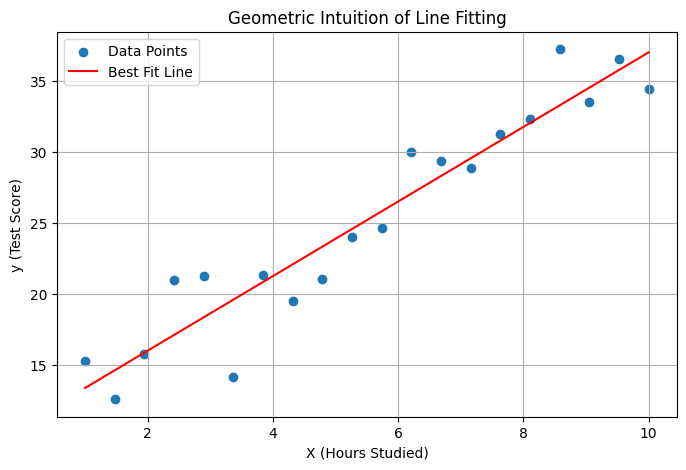

In [3]:

## **6. Python Code + Visualization**


import numpy as np
import matplotlib.pyplot as plt

# üéØ Simulated scenario: Hours studied vs. test score
np.random.seed(0)
X = np.linspace(1, 10, 20)
y = 3 * X + 7 + np.random.randn(20) * 3  # y = 3x + 7 + noise

# Fit using least squares (1st-degree polynomial)
theta_1, theta_0 = np.polyfit(X, y, deg=1)
y_pred = theta_0 + theta_1 * X

# Plotting
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label='Data Points')
plt.plot(X, y_pred, color='red', label='Best Fit Line')
plt.title("Geometric Intuition of Line Fitting")
plt.xlabel("X (Hours Studied)")
plt.ylabel("y (Test Score)")
plt.grid(True)
plt.legend()
plt.show()


## üß† **Assumptions of Linear Models**  

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

Linear regression looks simple: draw a line through points. But it only works well if certain **assumptions hold true**.

> **Analogy**: Think of building a bridge. If the foundation (assumptions) is shaky, the bridge (your model) might collapse, even if it looks fine.

These assumptions help ensure that:
- The model gives **unbiased** and **reliable** estimates.
- The predictions **generalize** well.
- The math behind statistical inference (like confidence intervals) is **valid**.

---

### üîë **Key Terminology**

| Term                  | Metaphor or Meaning |
|-----------------------|---------------------|
| **Linearity**          | The relationship is a straight line |
| **Independence**       | One data point doesn‚Äôt influence another |
| **Homoscedasticity**   | Residuals have equal variance everywhere |
| **Normality**          | Errors (not data) follow a normal distribution |
| **No multicollinearity** | Features aren‚Äôt strongly correlated with each other |

---

## **2. Mathematical Deep Dive** üßÆ

Here‚Äôs what each assumption looks like formally:

### üìè **Linearity**
$$
y = \theta_0 + \theta_1 x + \varepsilon
$$

> Model assumes the relationship between input(s) and output is **linear in parameters**.

---

### üìè **Independence of Errors**
$$
\text{Cov}(\varepsilon_i, \varepsilon_j) = 0 \quad \text{for } i \neq j
$$

> Errors between samples shouldn‚Äôt be related.

---

### üìè **Homoscedasticity (Constant Variance)**
$$
\text{Var}(\varepsilon_i) = \sigma^2
$$

> The **spread of residuals** should stay the same across the range of x.

---

### üìè **Normality of Errors**
$$
\varepsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

> Residuals should be **normally distributed**, especially important for statistical testing (e.g., p-values, confidence intervals).

---

### üìè **No Perfect Multicollinearity**
> No predictor should be a **linear combo** of others.

---

### ‚ö†Ô∏è **Violating Assumptions Leads To...**

| Violation             | Consequence |
|-----------------------|-------------|
| Non-linearity         | Bad fit, missed patterns |
| Correlated errors     | Underestimated standard errors |
| Heteroscedasticity    | Confidence intervals, tests become invalid |
| Non-normal errors     | Problematic statistical inference |
| Multicollinearity     | Unstable coefficients, inflated variance |

---

## **3. Critical Analysis** üîç

| Assumption        | How to Test                              | Fix if Broken |
|-------------------|-------------------------------------------|----------------|
| Linearity         | Plot residuals vs. fitted values          | Try polynomial features |
| Independence      | Durbin-Watson test, autocorrelation plot  | Shuffle/segment data |
| Homoscedasticity  | Residual plot, Breusch-Pagan test         | Use robust regression |
| Normality         | Q-Q plot, Shapiro-Wilk test               | Log-transform y |
| Multicollinearity | Check VIF (Variance Inflation Factor)     | Drop/reduce features |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** Which assumption is violated if the residuals grow larger as x increases?

- A) Linearity  
- B) Independence  
- C) Homoscedasticity  
- D) Multicollinearity

**Answer**: **C**

> This is a classic sign of **heteroscedasticity** ‚Äî unequal error variance.

---

### üß© **Code Debug Task**

```python
from statsmodels.stats.outliers_influence import variance_inflation_factor

def check_vif(X):
    vif = [variance_inflation_factor(X, i) for i in range(len(X))]  # Bug: wrong axis

# ‚úÖ Fix:
def check_vif(X):
    return [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
```

---

## **5. üìö Glossary**

| Term               | Meaning |
|--------------------|--------|
| **Linearity**        | Straight-line relationship between inputs and output |
| **Residual**         | Prediction error: \( y - \hat{y} \) |
| **Homoscedasticity** | Equal spread of residuals across inputs |
| **Multicollinearity**| Redundancy between input features |
| **Normality**        | Bell-curve shape of residuals distribution |

---


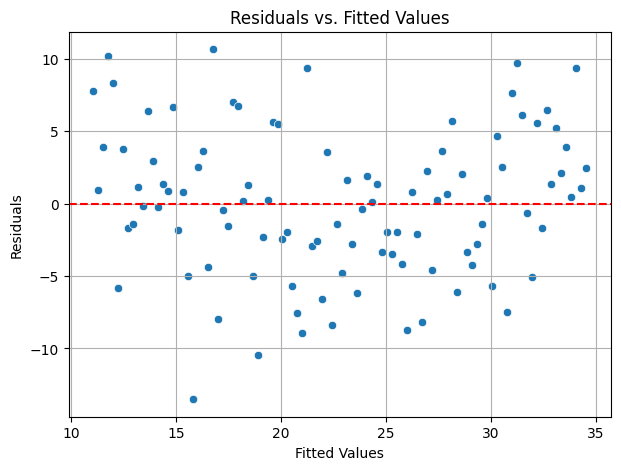

In [4]:

## **6. Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Simulate data with linear trend + noise
np.random.seed(0)
X = np.linspace(0, 10, 100)
y = 2.5 * X + 10 + np.random.normal(scale=5, size=100)

# Fit using statsmodels for access to diagnostics
X_with_intercept = sm.add_constant(X)
model = sm.OLS(y, X_with_intercept).fit()
residuals = model.resid
fitted = model.fittedvalues

# Residual plot to test LINEARITY + HOMOSCEDASTICITY
plt.figure(figsize=(7, 5))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


## üí• **Squared Error / Mean Squared Error (MSE)**  
> Why we square errors, how it forms the cost function, and what it teaches the model.

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

Your linear regression model makes predictions ‚Äî but how do you know if they‚Äôre **any good**?

That‚Äôs what the **cost function** does: it quantifies how far off the model is ‚Äî and **gives the model something to optimize**.

> **Analogy**: Imagine playing golf blindfolded. After each shot, someone tells you how far you missed. That‚Äôs the cost. Your goal: minimize it.

We use the **squared error** because it:
- Penalizes large mistakes **more heavily**
- Keeps all values **positive**
- Is **smooth and differentiable**, making optimization easier

---

### üîë **Key Terminology**

| Term          | Meaning or Analogy |
|---------------|---------------------|
| **Error**      | \( y - \hat{y} \) ‚Üí How far off your prediction is |
| **Squared Error** | Square of the error ‚Üí Bigger mistake = bigger penalty |
| **Cost Function (J)** | Average of squared errors across all data |
| **MSE (Mean Squared Error)** | Standard form of cost function in linear regression |

---

## **2. Mathematical Deep Dive** üßÆ

### üìè **Squared Error for One Sample**

$$
\text{Error} = y - h_\theta(x) \\
\text{Squared Error} = (y - h_\theta(x))^2
$$

---

### üìè **Mean Squared Error (Full Dataset)**

For \( m \) training examples:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

- The \( \frac{1}{2} \) simplifies the derivative during gradient descent (next topic).
- The goal is to find \( \theta \) that **minimizes** \( J(\theta) \)

---

### ‚ö†Ô∏è **Pitfalls & Visual Warnings**

| Problem            | Impact                    |
|--------------------|---------------------------|
| Large errors dominate | Outliers can skew the cost |
| Squaring hides direction | You lose info on whether you're above or below the actual |
| Not ideal for classification | Better use log loss for that |

---

## **3. Critical Analysis** üîç

| Benefit                     | Limitation                        |
|-----------------------------|------------------------------------|
| Differentiable and smooth   | Sensitive to outliers             |
| Easy to interpret and implement | Doesn‚Äôt reflect direction of errors |
| Forms the foundation for optimization | Not robust to heavy noise |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** Why is the error squared in MSE?

- A) To make the error positive  
- B) To exaggerate large errors  
- C) To simplify gradient computation  
- D) All of the above

**Answer**: **D**

> The squared error does all three: positivity, sensitivity, and smoother math.

---

### üß© **Code Debug Task**

```python
def compute_mse(y_true, y_pred):
    return np.sum(y_true - y_pred)**2 / len(y_true)  # ‚ùå bug: squaring sum, not individual errors

# ‚úÖ Fix:
def compute_mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)
```

> MSE = average of **individual squared errors**, not squared sum.

---

## **5. üìö Glossary**

| Term       | Meaning |
|------------|---------|
| **MSE**     | Average of squared prediction errors |
| **Cost Function** | Scalar function to be minimized |
| **Squared Error** | Square of the prediction gap |
| **Loss**    | Error for a single data point |
| **Optimization Target** | What the model is trying to minimize |

---



Good prediction MSE: 0.007499999999999976
Bad prediction MSE: 9.666666666666666


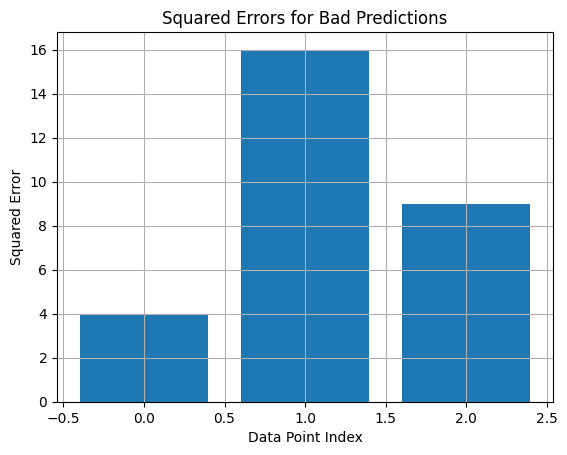

In [5]:

## **6. Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt

# Simulate prediction vs. true values
y_true = np.array([3, 5, 7])
y_pred_good = np.array([2.9, 5.1, 7.05])
y_pred_bad = np.array([1, 9, 4])

# MSE function
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

print("Good prediction MSE:", mse(y_true, y_pred_good))
print("Bad prediction MSE:", mse(y_true, y_pred_bad))

# Visualize squared errors
errors = y_true - y_pred_bad
squared_errors = errors**2

plt.bar(range(len(errors)), squared_errors)
plt.title("Squared Errors for Bad Predictions")
plt.xlabel("Data Point Index")
plt.ylabel("Squared Error")
plt.grid(True)
plt.show()

  ## üö∂‚Äç‚ôÇÔ∏è **Gradient Descent (Single Variable)**  
> How the model learns by walking downhill on the cost surface ‚Äî one variable, one step at a time.

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

Once we‚Äôve defined the cost function (MSE), the next question is:  
**‚ÄúHow do we find the parameters \( \theta_0, \theta_1 \) that minimize it?‚Äù**

We do this using **gradient descent** ‚Äî an iterative algorithm that adjusts the parameters **by following the slope** of the cost curve.

> **Analogy**: You‚Äôre walking down a mountain in the fog. You can‚Äôt see the bottom, but you can feel the slope. You take small steps **downhill** until the ground levels out.

---

### üîë **Key Terminology**

| Term             | Metaphor / Meaning |
|------------------|--------------------|
| **Gradient**      | The slope of the cost ‚Äî tells us direction |
| **Learning Rate (Œ±)** | Step size ‚Äî how far to move each time |
| **Convergence**   | When further steps don‚Äôt improve much |
| **Epoch**         | One full update cycle over the dataset |
| **Update Rule**   | The math behind each step‚Äôs adjustment |

---

## **2. Mathematical Deep Dive** üßÆ

### üìè **Cost Function (1 Variable)**

For a univariate model:  
$$
h_\theta(x) = \theta_0 + \theta_1 x \\
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \theta_0 + \theta_1 x^{(i)} - y^{(i)} \right)^2
$$

---

### üîÅ **Update Rules**

The parameters are updated simultaneously:

$$
\theta_0 := \theta_0 - \alpha \cdot \frac{\partial J}{\partial \theta_0}
$$

$$
\theta_1 := \theta_1 - \alpha \cdot \frac{\partial J}{\partial \theta_1}
$$

Where:

$$
\frac{\partial J}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})
$$

$$
\frac{\partial J}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x^{(i)}
$$

---

### ‚ö†Ô∏è **Pitfalls**

| Mistake | Consequence |
|--------|-------------|
| Learning rate too high | Overshoots minimum, may diverge |
| Too low | Takes forever to converge |
| Not updating both Œ∏‚ÇÄ and Œ∏‚ÇÅ | Incomplete optimization |
| Not vectorizing | Slow for large datasets |

---

## **3. Critical Analysis** üîç

| Pros                       | Cons                                |
|----------------------------|-------------------------------------|
| Simple, widely used        | Can get stuck in local minima (not a problem in linear regression) |
| Scales well with large data | Requires tuning learning rate       |
| Works with noisy gradients | Sensitive to feature scale (‚Üí feature scaling) |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** What role does the learning rate (Œ±) play in gradient descent?

- A) It controls the number of iterations  
- B) It decides which feature to update  
- C) It scales the parameter update step  
- D) It increases the model complexity

**Answer**: **C**

> Learning rate controls **how far** each parameter moves in the direction of the gradient.

---

### üß© **Code Debug Task**

```python
def update_theta(x, y, theta_0, theta_1, alpha):
    m = len(x)
    error = (theta_0 + theta_1 * x - y)
    theta_0 -= alpha * np.sum(error)     # missing averaging
    theta_1 -= alpha * np.sum(error * x)
    return theta_0, theta_1

# ‚úÖ Fix:
def update_theta(x, y, theta_0, theta_1, alpha):
    m = len(x)
    error = (theta_0 + theta_1 * x - y)
    theta_0 -= alpha * (1/m) * np.sum(error)
    theta_1 -= alpha * (1/m) * np.sum(error * x)
    return theta_0, theta_1
```

---

## **5. üìö Glossary**

| Term            | Meaning |
|------------------|--------|
| **Gradient**      | The slope of the cost function surface |
| **Learning Rate** | How big of a step you take each update |
| **Cost Function** | What the model is trying to minimize |
| **Convergence**   | When updates are small/stabilized |
| **Univariate**    | One feature only |

---


Learned parameters: Œ∏‚ÇÄ = 1.08, Œ∏‚ÇÅ = 2.53


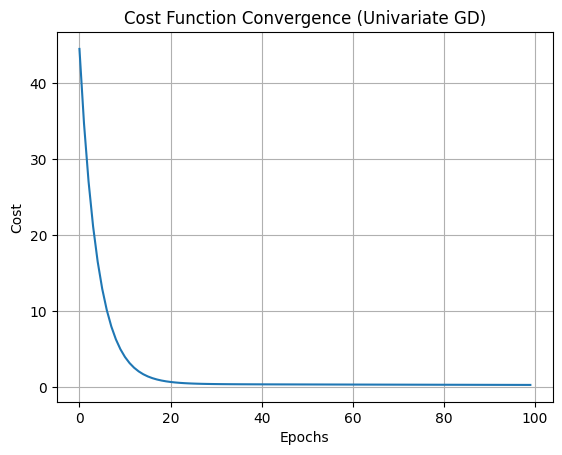

In [6]:

## **6. Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt

# Data
X = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

# Parameters
theta_0 = 0
theta_1 = 0
alpha = 0.01
epochs = 100

# Store cost history for plotting
costs = []

# Gradient Descent Loop
for epoch in range(epochs):
    predictions = theta_0 + theta_1 * X
    error = predictions - y
    cost = np.mean(error ** 2) / 2
    costs.append(cost)
    
    theta_0 -= alpha * np.mean(error)
    theta_1 -= alpha * np.mean(error * X)

print(f"Learned parameters: Œ∏‚ÇÄ = {theta_0:.2f}, Œ∏‚ÇÅ = {theta_1:.2f}")

# Plot cost over time
plt.plot(range(epochs), costs)
plt.title("Cost Function Convergence (Univariate GD)")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


 ## üß† **Gradient Descent (Multivariable)**  
> Extending gradient descent to multiple features ‚Äî same idea, more dimensions, more power.

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

In real-world problems, we usually have **multiple features** ‚Äî not just one.  
Example: predicting house price using **size**, **bedrooms**, **age**, **location**, etc.

The hypothesis becomes:

> A **plane**, **hyperplane**, or **n-dimensional surface**, instead of just a line.

> **Analogy**: You‚Äôre no longer skiing down a hill ‚Äî you‚Äôre skiing down a **mountain range** with many slopes. But the goal is still the same: reach the bottom.

---

### üîë **Key Terminology**

| Term               | Meaning / Analogy |
|--------------------|-------------------|
| **Multivariate**    | Multiple input features (columns of X) |
| **Feature Vector**  | A row of inputs \( x^{(i)} \) |
| **Weights / Coefficients** | \( \theta_1, \theta_2, ..., \theta_n \) |
| **Gradient**        | Partial derivatives of cost with respect to each \( \theta_j \) |
| **Batch Gradient Descent** | Update using all training data at once |

---

## **2. Mathematical Deep Dive** üßÆ

### üìè **Multivariate Hypothesis**

$$
h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n = \theta^T x
$$

Where:
- \( x \in \mathbb{R}^{n+1} \), with \( x_0 = 1 \)
- \( \theta \in \mathbb{R}^{n+1} \)

---

### üîÅ **Gradient Descent Updates (All Œ∏)**

For each parameter \( \theta_j \):

$$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^{m} \left(h_\theta(x^{(i)}) - y^{(i)}\right) x_j^{(i)}
$$

This update happens **simultaneously for all Œ∏s**.

---

### ‚ö†Ô∏è **Pitfalls**

| Mistake                   | Consequence                      |
|---------------------------|-----------------------------------|
| Forgetting \( x_0 = 1 \)   | No bias term (Œ∏‚ÇÄ), wrong model    |
| Features on different scales | Slow or failed convergence       |
| Using scalar instead of vector ops | Extremely slow, error-prone |

---

## **3. Critical Analysis** üîç

| Strengths                  | Weaknesses                         |
|----------------------------|------------------------------------|
| Generalizes to any number of features | Sensitive to scaling             |
| Works well with matrix algebra        | Needs clean, numeric input only  |
| Enables more realistic models         | Manual feature engineering often required |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** In multivariable gradient descent, what does the term \( x_j^{(i)} \) in the update rule represent?

- A) The output variable  
- B) The j-th feature of the i-th example  
- C) The prediction error  
- D) The learning rate

**Answer**: **B**

> It‚Äôs the input value for feature **j** in training example **i** ‚Äî part of the gradient update.

---

### üß© **Code Debug Task**

```python
def gradient_step(X, y, theta, alpha):
    m = len(y)
    error = X @ theta - y
    gradient = error @ X  # ‚ùå shape mismatch and missing average
    theta -= alpha * gradient
    return theta

# ‚úÖ Fix:
def gradient_step(X, y, theta, alpha):
    m = len(y)
    error = X @ theta - y
    gradient = (1/m) * X.T @ error
    theta -= alpha * gradient
    return theta
```

> Use **X.T @ error** to compute all partial derivatives at once.

---

## **5. üìö Glossary**

| Term              | Meaning |
|-------------------|--------|
| **Multivariable**   | More than one input feature |
| **Gradient Vector** | List of all partial derivatives |
| **Feature Scaling** | Making all features on similar scale |
| **Batch GD**        | Uses the whole dataset for each update |
| **Simultaneous Update** | All Œ∏s update at the same time |

---



Learned parameters: [1.94 2.18 3.6 ]


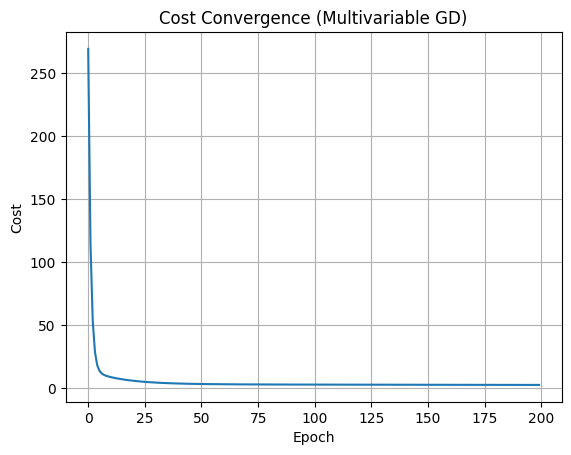

In [7]:

## **6. Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic multivariate data
np.random.seed(0)
m = 100
X1 = np.random.rand(m) * 10       # Feature 1
X2 = np.random.rand(m) * 5        # Feature 2
X = np.c_[np.ones(m), X1, X2]     # Add bias term (x‚ÇÄ = 1)
true_theta = np.array([5, 2, 3])  # y = 5 + 2*X1 + 3*X2
y = X @ true_theta + np.random.randn(m) * 2  # Add noise

# Initialize
theta = np.zeros(3)
alpha = 0.01
epochs = 200
cost_history = []

# Gradient Descent
for _ in range(epochs):
    error = X @ theta - y
    gradient = (1/m) * X.T @ error
    theta -= alpha * gradient
    cost = np.mean(error ** 2) / 2
    cost_history.append(cost)

print(f"Learned parameters: {theta.round(2)}")

# Plot cost convergence
plt.plot(cost_history)
plt.title("Cost Convergence (Multivariable GD)")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

## ‚ö° **Vectorization for Speedup**  
  
> Ditch slow loops. This is how we make gradient descent lightning fast using linear algebra.

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

Gradient descent is powerful ‚Äî but in practice, **looping through features and examples is slow**.

**Vectorization** turns those loops into **matrix operations**, which are:
- Optimized by low-level libraries (e.g., BLAS, LAPACK)
- Executed in parallel (even on GPUs)
- More readable and elegant

> **Analogy**: Instead of painting pixels one at a time, vectorization is like using a paint roller that covers the whole wall in one swipe.

---

### üîë **Key Terminology**

| Term             | Meaning |
|------------------|--------|
| **Vectorization** | Writing math using matrix ops instead of for-loops |
| **Broadcasting**  | NumPy trick to expand arrays for operations |
| **Dot Product**   | Single-step way to compute weighted sums |
| **Matrix Multiplication** | All predictions or gradients in one operation |

---

## **2. Mathematical Deep Dive** üßÆ

### üß† **Vectorized Hypothesis**

Instead of:

$$
h_\theta(x^{(i)}) = \theta_0 + \theta_1 x_1^{(i)} + \dots + \theta_n x_n^{(i)}
$$

We write:

$$
h = X \cdot \theta
$$

Where:
- \( X \) is an \( m \times (n+1) \) matrix (rows = examples, cols = features)
- \( \theta \) is an \( (n+1) \times 1 \) vector

---

### üß† **Vectorized Gradient**

Cost function gradient (across all examples):

$$
\text{gradient} = \frac{1}{m} \cdot X^T \cdot (X\theta - y)
$$

Update rule:

$$
\theta := \theta - \alpha \cdot \text{gradient}
$$

One-liner for everything.

---

### ‚ö†Ô∏è **Pitfalls**

| Issue                | Why it breaks |
|----------------------|---------------|
| Forgetting intercept column | You lose \( \theta_0 \) (bias) |
| Wrong dimensions in dot product | Runtime shape errors |
| Writing loop instead | Much slower, hard to scale |

---

## **3. Critical Analysis** üîç

| Strengths              | Weaknesses         |
|------------------------|--------------------|
| Very fast              | Can be hard to debug |
| Cleaner code           | Requires understanding of matrix math |
| Easily parallelized    | Can hide logic mistakes if misaligned |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** What does vectorization in gradient descent mainly achieve?

- A) Reduces the number of epochs needed  
- B) Avoids feature scaling  
- C) Speeds up computation by avoiding loops  
- D) Improves model accuracy

**Answer**: **C**

> Vectorization keeps the math the same, but runs it way faster.

---

### üß© **Code Debug Task**

```python
# ‚ùå Buggy: mixing dot and element-wise ops
gradient = X * (X @ theta - y) / m

# ‚úÖ Fix:
gradient = (1/m) * X.T @ (X @ theta - y)
```

> The gradient is a dot product of features and error ‚Äî not element-wise multiplication.

---

## **5. üìö Glossary**

| Term             | Meaning |
|------------------|--------|
| **Vectorization** | Rewriting code using NumPy/matrix math |
| **Matrix Product** | Multi-row dot product |
| **Broadcasting**  | Expanding shapes to align in NumPy |
| **Shape Mismatch**| Classic error when dimensions don‚Äôt align |
| **Speedup**       | Huge performance gain from removing for-loops |

---


Learned Œ∏: [0.09 2.04 3.08]


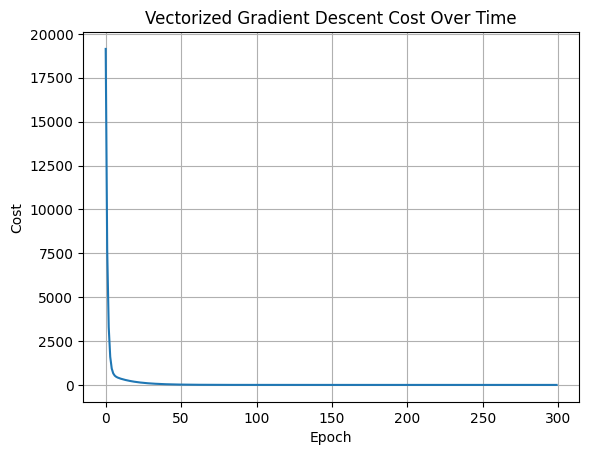

In [8]:

## **6. Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt

# Synthetic multivariable data
np.random.seed(1)
m = 200
X1 = np.random.rand(m) * 100
X2 = np.random.rand(m) * 50
X = np.c_[np.ones(m), X1, X2]  # Add intercept term
true_theta = np.array([5, 2, 3])
y = X @ true_theta + np.random.randn(m) * 5

# Initialize
theta = np.zeros(3)
alpha = 0.0001
epochs = 300
costs = []

# Vectorized GD
for _ in range(epochs):
    error = X @ theta - y
    gradient = (1/m) * X.T @ error
    theta -= alpha * gradient
    costs.append(np.mean(error**2) / 2)

print("Learned Œ∏:", theta.round(2))

# Plot convergence
plt.plot(costs)
plt.title("Vectorized Gradient Descent Cost Over Time")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.grid(True)
plt.show()


## üìä **R¬≤ Score (Coefficient of Determination)**  
> A simple but powerful metric that tells you **how much of the variance** in the data your model explains.

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

Even if your model fits ‚Äî **how well does it explain the data?**

That‚Äôs what the **R¬≤ score** measures:  
> *‚ÄúHow much better is my model than just guessing the average?‚Äù*

> **Analogy**: Imagine trying to guess students' grades. If you always predict the class average, you‚Äôll be wrong often. A regression model that does better than that gets a high R¬≤. If it does worse ‚Äî R¬≤ can even be negative!

---

### üîë **Key Terminology**

| Term         | Meaning / Analogy |
|--------------|--------------------|
| **R¬≤ Score**  | Proportion of explained variance |
| **SSR**       | Sum of squared residuals (model error) |
| **SST**       | Total variance in the data |
| **Baseline**  | Prediction = average value (used for comparison) |

---

## **2. Mathematical Deep Dive** üßÆ

### üìè **Core Formula**

Let:
- \( y^{(i)} \): actual values  
- \( \hat{y}^{(i)} \): predicted values  
- \( \bar{y} \): mean of true values

Then:

$$
R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
$$

- Numerator: Unexplained variance (model error)  
- Denominator: Total variance (baseline error)

---

### üìä **Intuition**

| R¬≤ Value     | What It Means                      |
|--------------|-------------------------------------|
| **1.0**       | Perfect fit                         |
| **0.0**       | No better than mean prediction      |
| **< 0**       | Worse than predicting the mean (!?) |

> **R¬≤ is unitless**. It measures improvement over the baseline (mean of y), not raw error.

---

### ‚ö†Ô∏è **Pitfalls**

| Mistake                      | Consequence |
|------------------------------|-------------|
| Using R¬≤ on non-linear fits  | Misleading confidence |
| Using R¬≤ for classification  | Doesn't apply at all |
| Assuming R¬≤ = high accuracy  | It only tells how much variance is explained, not how "right" you are |

---

## **3. Critical Analysis** üîç

| Strengths                    | Limitations                        |
|-----------------------------|------------------------------------|
| Easy to interpret            | Can give false security if model is biased |
| Works well with linear models | Misleads on non-linear fits        |
| Normalized (0‚Äì1 scale)       | Not sensitive to overfitting       |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** What does it mean if a model has an R¬≤ of 0.6?

- A) It predicts with 60% accuracy  
- B) It explains 60% of the variance in y  
- C) It has 60% less error than a random model  
- D) It got 60% of predictions right

**Answer**: **B**

> R¬≤ = 0.6 means the model explains 60% of the variation in the dependent variable.

---

### üß© **Code Debug Task**

```python
def r2_score(y_true, y_pred):
    return 1 - np.sum((y_pred - y_true)**2 / np.sum((y_true - np.mean(y_true))**2))  # ‚ùå Wrong placement of parentheses

# ‚úÖ Fix:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res / ss_tot
```

---

## **5. üìö Glossary**

| Term        | Meaning |
|-------------|---------|
| **R¬≤ Score** | % of variance in y that is captured by the model |
| **SSR**      | Residual sum of squares ‚Äî model error |
| **SST**      | Total sum of squares ‚Äî total data variation |
| **Explained Variance** | How much structure the model captures |
| **Baseline Model** | One that always predicts the mean of y |

---


R¬≤ Score: 0.89


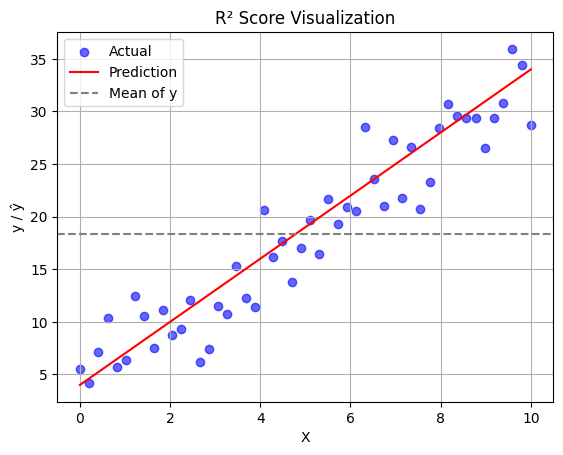

In [9]:

## **6. Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Simulated data
np.random.seed(42)
X = np.linspace(0, 10, 50)
y = 3 * X + 4 + np.random.randn(50) * 3

# Fit manually (simulate perfect model)
theta_0, theta_1 = 4, 3
y_pred = theta_0 + theta_1 * X

# R¬≤ calculation
r2 = r2_score(y, y_pred)
print(f"R¬≤ Score: {r2:.2f}")

# Plot
plt.scatter(X, y, label="Actual", color="blue", alpha=0.6)
plt.plot(X, y_pred, label="Prediction", color="red")
plt.axhline(np.mean(y), linestyle='--', color='gray', label="Mean of y")
plt.title("R¬≤ Score Visualization")
plt.xlabel("X")
plt.ylabel("y / yÃÇ")
plt.legend()
plt.grid(True)
plt.show()


## üöß **Underfitting & Model Diagnostics**  
> Learn how to recognize an underfit model, diagnose it visually and mathematically, and fix it before it fails silently.

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

Just like a student who hasn‚Äôt studied enough, a model can **underfit** ‚Äî it‚Äôs too simple to learn the patterns in the data.

Underfitting happens when the model:
- Has too few features or complexity
- Doesn‚Äôt train long enough
- Can't capture trends even in training data

> **Analogy**: It‚Äôs like drawing a straight line through a set of squiggly dots ‚Äî you're clearly missing something.

---

### üîë **Key Terminology**

| Term             | Meaning / Analogy |
|------------------|--------------------|
| **Underfitting**  | Model is too simple to capture the data |
| **Bias**          | Systematic error due to incorrect assumptions |
| **High Bias**     | Model is stuck using an overly rigid rule |
| **Residual Pattern** | Structured error pattern = model is blind to trend |
| **Diagnostic Plot** | Visual test to spot problems in predictions |

---

## **2. Mathematical Deep Dive** üßÆ

### üìâ **Underfitting Looks Like**

- **Training error is high**
- **Test error is also high**
- No overfitting ‚Äî it never learned in the first place

---

### üìè **Signs of Underfitting**

- R¬≤ ‚â™ 1
- High MSE
- Residuals show clear patterns (non-random scatter)
- The hypothesis function has too low complexity (e.g., linear fit for non-linear data)

---

### ‚ö†Ô∏è **Pitfalls**

| Mistake                     | Result |
|-----------------------------|--------|
| Using a linear model on curved data | Missed trends |
| Not enough features         | Model can‚Äôt learn structure |
| Low training time / bad hyperparameters | Model doesn‚Äôt converge |

---

## **3. Critical Analysis** üîç

| Issue           | Symptom | Fix |
|------------------|--------|-----|
| High bias         | Bad on train/test | Increase model complexity |
| Poor learning     | Flat cost curve | Adjust learning rate or train longer |
| Feature blindness | Poor residual plot | Add new or transformed features |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** Which is a likely sign of underfitting?

- A) Very low training error but high test error  
- B) Model predicts well but only for one class  
- C) Training and test error are both high  
- D) The cost function keeps increasing

**Answer**: **C**

> If both errors are high, the model likely **never learned well** in the first place = underfitting.

---

### üß© **Code Debug Task**

```python
def underfit_predict(x):
    return np.mean(x)  # ‚ùå trivial constant prediction, not a model

# ‚úÖ Fix:
def underfit_predict(x, theta_0, theta_1):
    return theta_0 + theta_1 * x
```

> Underfitting often happens when your model is too simple ‚Äî like predicting a constant value.

---

## **5. üìö Glossary**

| Term            | Meaning |
|------------------|--------|
| **Underfitting**  | Model fails to learn relationships from training data |
| **Bias**          | Error from oversimplified assumptions |
| **Residual**      | Difference between predicted and true value |
| **Residual Plot** | Scatter of prediction errors across inputs |
| **Complexity**    | How flexible the model is in capturing patterns |

---



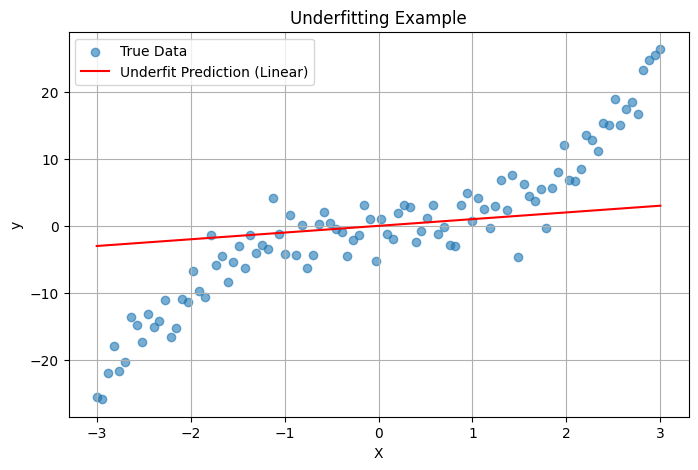

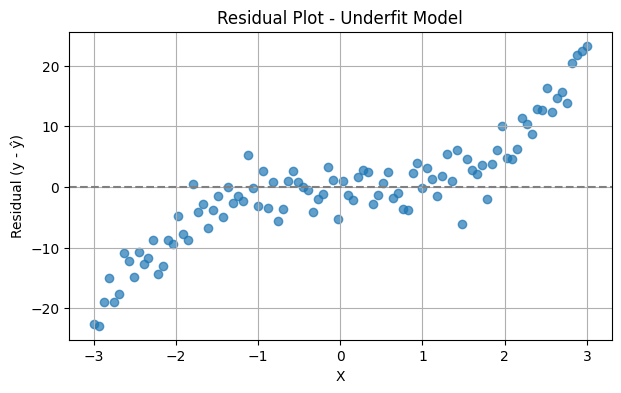

In [10]:

## **6. Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt

# Simulated nonlinear data
np.random.seed(42)
X = np.linspace(-3, 3, 100)
y = X**3 + np.random.randn(100) * 3  # Cubic relationship

# Underfit model: linear regression
theta_0, theta_1 = 0, 1  # Simplistic model
y_pred = theta_0 + theta_1 * X

# Plot predictions
plt.figure(figsize=(8, 5))
plt.scatter(X, y, label="True Data", alpha=0.6)
plt.plot(X, y_pred, color='red', label="Underfit Prediction (Linear)")
plt.title("Underfitting Example")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Residuals
residuals = y - y_pred
plt.figure(figsize=(7, 4))
plt.scatter(X, residuals, alpha=0.7)
plt.axhline(0, color='gray', linestyle='--')
plt.title("Residual Plot - Underfit Model")
plt.xlabel("X")
plt.ylabel("Residual (y - yÃÇ)")
plt.grid(True)
plt.show()

# üß© **3. Evaluation & Interpretation**  
## üó∫Ô∏è **Visualizing Cost Surface**  
#### <a id="cost-surface"></a>Visualizing Cost Surface
> A guided tour through the ‚Äúlandscape‚Äù your model is trying to navigate ‚Äî hills, valleys, and the elusive global minimum.

---

## **1. Conceptual Foundation**

### ‚úÖ **Purpose & Relevance**

The **cost function** isn‚Äôt just a formula ‚Äî it‚Äôs a **landscape**. When you use gradient descent, you're navigating that terrain, looking for the lowest point.

> **Analogy**: Imagine the cost surface as a mountain range. The **height** at any point represents the cost at a particular choice of \( \theta_0 \) and \( \theta_1 \). Gradient descent is your hiker ‚Äî always trying to go downhill.

Visualizing this surface helps:
- Understand how the model *learns*
- Detect bad learning rates
- See if your cost function is well-behaved

---

### üîë **Key Terminology**

| Term            | Meaning / Analogy |
|------------------|-------------------|
| **Cost Surface**  | 3D plot showing cost for every combination of parameters |
| **Contour Plot**  | Top-down map view of the surface (like elevation lines) |
| **Global Minimum**| Point where cost is lowest ‚Äî optimal Œ∏ |
| **Gradient**      | The slope at a point on the surface |
| **Learning Path** | The sequence of Œ∏ updates over time |

---

## **2. Mathematical Deep Dive** üßÆ

### üìè **Surface for Univariate Linear Regression**

Let:
$$
J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m} \left( \theta_0 + \theta_1 x^{(i)} - y^{(i)} \right)^2
$$

Now treat \( \theta_0 \) and \( \theta_1 \) as axes ‚Äî and cost \( J \) as **height**.

- This gives you a smooth bowl-shaped surface.
- The bottom = the **optimal** parameter values.

---

### ‚ö†Ô∏è **Pitfalls**

| Pitfall | Consequence |
|--------|-------------|
| Sharp valleys | Gradient descent might zigzag |
| Flat slopes | Convergence is slow |
| Saddle points (not here) | Only in complex models (neural nets) |

---

## **3. Critical Analysis** üîç

| Visual Element       | What It Shows |
|----------------------|----------------|
| 3D surface           | Shape of the optimization landscape |
| Contour plot         | Cost levels (closer lines = steeper slope) |
| Gradient descent path| Whether you're moving efficiently toward the minimum |

---

## **4. Interactive Elements** üéØ

### ‚úÖ **Concept Check (HARD)**

**Q:** What does a cost surface with a flat slope near the top indicate?

- A) You are near the global minimum  
- B) You are in a local minimum  
- C) You are far from the minimum and learning will be slow  
- D) Gradient is steep and step size will increase

**Answer**: **C**

> Flat slope = small gradients = slow learning, far from the minimum.

---

### üß© **Code Debug Task**

```python
cost = np.sum((y - y_pred) ** 2 / 2 * m)  # ‚ùå Parentheses error

# ‚úÖ Fix:
cost = np.sum((y - y_pred) ** 2) / (2 * m)
```

> Always divide the total squared error **after** summing, and don‚Äôt mess up the order of ops.

---

## **5. üìö Glossary**

| Term             | Meaning |
|------------------|--------|
| **Cost Surface**   | 3D landscape of cost values |
| **Contour Plot**   | 2D view with cost levels as curves |
| **Gradient**       | Direction of steepest descent |
| **Global Minimum** | Lowest cost (optimal Œ∏) |
| **Learning Path**  | Parameter updates over time |

---


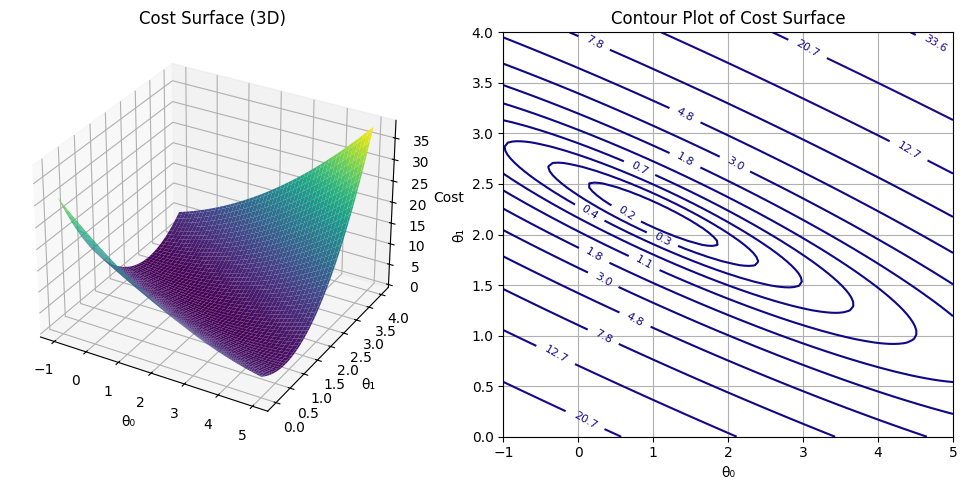

In [11]:

## **6. Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt

# Simulate small data
X = np.array([1, 2, 3, 4])
y = np.array([3, 6, 7, 10])
m = len(y)

# Define cost function for arbitrary Œ∏‚ÇÄ and Œ∏‚ÇÅ
def compute_cost(theta_0, theta_1):
    predictions = theta_0 + theta_1 * X
    return np.sum((predictions - y) ** 2) / (2 * m)

# Generate grid of Œ∏ values
theta0_vals = np.linspace(-1, 5, 100)
theta1_vals = np.linspace(0, 4, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        J_vals[i, j] = compute_cost(theta0_vals[i], theta1_vals[j])

# Transpose for correct orientation
J_vals = J_vals.T

# 3D Surface Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(121, projection='3d')
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)
ax.plot_surface(T0, T1, J_vals, cmap='viridis')
ax.set_xlabel('Œ∏‚ÇÄ')
ax.set_ylabel('Œ∏‚ÇÅ')
ax.set_zlabel('Cost')
ax.set_title('Cost Surface (3D)')

# Contour Plot
plt.subplot(1, 2, 2)
cp = plt.contour(T0, T1, J_vals, levels=np.logspace(-1, 3, 20), cmap='plasma')
plt.clabel(cp, inline=True, fontsize=8)
plt.xlabel('Œ∏‚ÇÄ')
plt.ylabel('Œ∏‚ÇÅ')
plt.title('Contour Plot of Cost Surface')
plt.grid(True)
plt.tight_layout()
plt.show()
